# Instructions

Answer the questions and perform any additional analysis you think will help you understand what's going on in the data. You will be required to present your work, you can use this notebook or create slides based on your analysis. Whatever you’re comfortable with is fine with us.

The section headings below are only a guide and this notebook should be modified as you see fit.

# 1. Data processing

In [ ]:
import pandas as pd
from sklearn.impute import *
from matplotlib import pyplot as plt
import numpy as np
import warnings


warnings.filterwarnings('ignore')

Data = pd.read_csv('data.csv')

In [ ]:
Data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


#**First getting the average from all numerical Columns and replacing any null values found in their rows with the average:**

In [ ]:
data = Data.iloc[:, 2:].values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(data)
data = imputer.transform(data)
data = pd.DataFrame(data=data, columns=Data.columns[2:])
data.insert(0, 'Country', Data.Country)
data.insert(1, 'Region', Data.Region)
Data = data

**Taking a look at our new, more informed Data Set:**

In [ ]:
Data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825.0,47.42,3.82,5.400000,60.0,98.5,54.26,83.71068,1140.000000,90.850495,89.632673
1,Albania,Europe,3162.0,21.33,14.93,1.750000,74.0,16.7,96.39,83.71068,8820.000000,90.850495,89.632673
2,Algeria,Africa,38482.0,27.42,7.17,2.830000,73.0,20.0,98.99,83.71068,8310.000000,98.200000,96.400000
3,Andorra,Europe,78.0,15.20,22.86,2.940656,82.0,3.2,75.49,83.71068,13320.925926,78.400000,79.400000
4,Angola,Africa,20821.0,47.58,3.84,6.100000,51.0,163.5,48.38,70.10000,5230.000000,93.100000,78.200000


**Checking for any duplicates, then getting the total of all duplicated items, 0 will return if there isn't any duplicated data:**

In [ ]:
Data.duplicated(subset=None, keep='first').sum()

0

# 2. Exploratory data analysis

#**Country with the lowest % of population Under 15 :**

In [ ]:
percentages = Data.groupby('Under15')['Country'].min()
percentages.head(1)

Under15
13.12    Japan
Name: Country, dtype: object

#**Country with the highest percentage of population Under 15:**

In [ ]:
percentages.tail(1)

Under15
49.99    Niger
Name: Country, dtype: object

#**Region with the highest % of population over 60:**

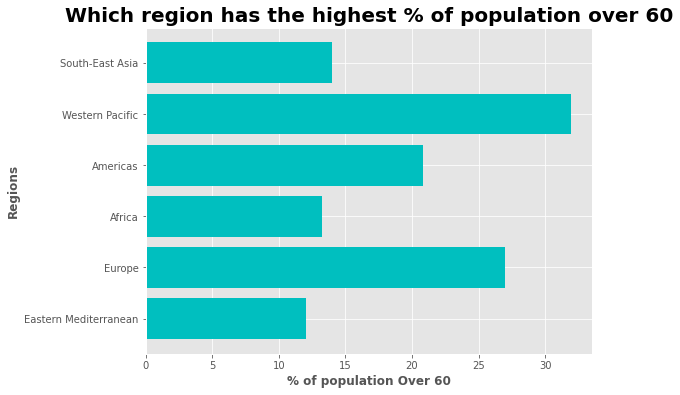

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (8, 6))
plt.barh(Data.Region, Data.Over60, color = 'c')
plt.title('Which region has the highest % of population over 60', fontweight='bold', fontsize=20)
plt.xlabel('% of population Over 60', fontweight='bold')
plt.ylabel('Regions', fontweight='bold')
plt.show()

*So this means that **Western Pacific** has the highest % of population over 60*


#**Checking the relationship between Fertility rates and Income:**

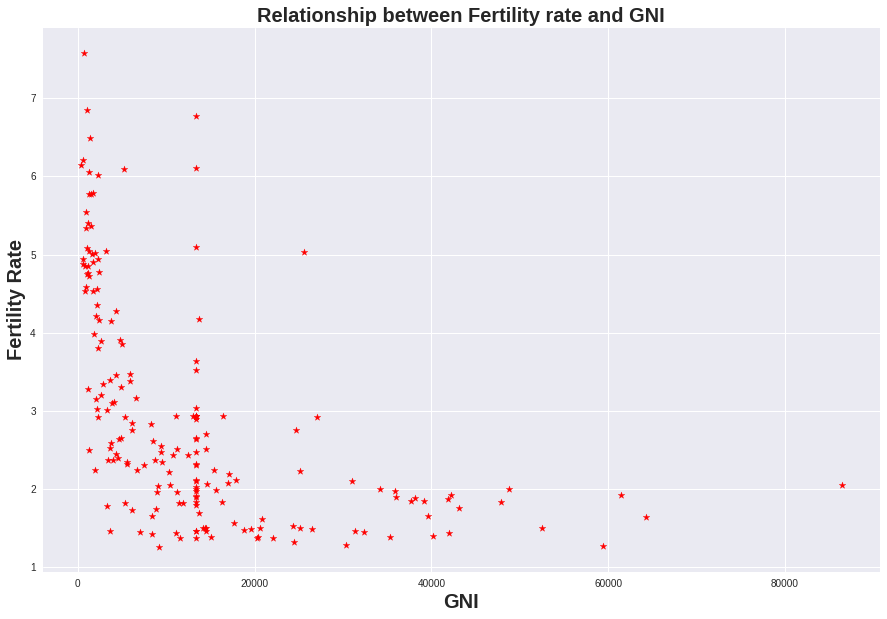

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))
plt.title('Relationship between Fertility rate and GNI', fontweight='bold', fontsize=20)
plt.scatter(Data.GNI, Data.FertilityRate, marker="*", color = "Red")
plt.ylabel('Fertility Rate', fontweight='bold', fontsize=20)
plt.xlabel('GNI', fontweight='bold', fontsize=20)
plt.show()

*The data tells us that the relationship between Fertility rate and GNI is that, the more GNI a country has, the less its average fertility rate. Although there are exceptions whereby some countries have a higher than average GNI but still have a high fertility rate. However, the common case scenario is that the less the GNI, the more likely that the fertility rates are high.*

#**Which regions have the lowest literacy rates?**

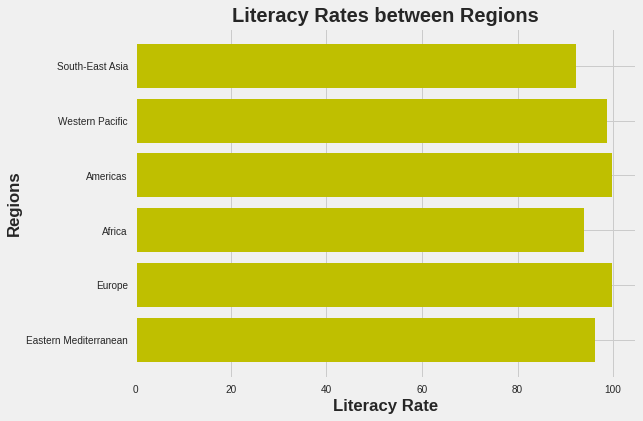

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.barh(Data.Region, Data.LiteracyRate, color = 'y')
plt.title('Literacy Rates between Regions', fontsize=20, fontweight='bold')
plt.xlabel("Literacy Rate", fontweight='bold')
plt.ylabel('Regions', fontweight='bold')
plt.show()

*The above graph tells us that **South-East Asia** and **Africa** have the lowest Literacy Rates*

#**Checking Child mortality rates between Regions**

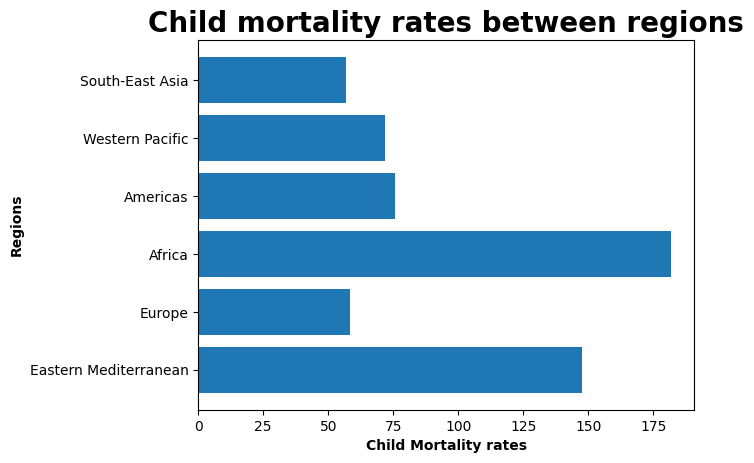

In [ ]:
plt.style.use('default')
plt.barh(Data.Region, Data.ChildMortality)
plt.title('Child mortality rates between regions', fontsize=20, fontweight='bold')
plt.xlabel('Child Mortality rates', fontweight='bold')
plt.ylabel('Regions', fontweight='bold')
plt.show()

*As the graph above visualizes, **Sout-East Asia and Europe** have the lowest Child Mortality rates*

#**Life expectancy across different regions:**

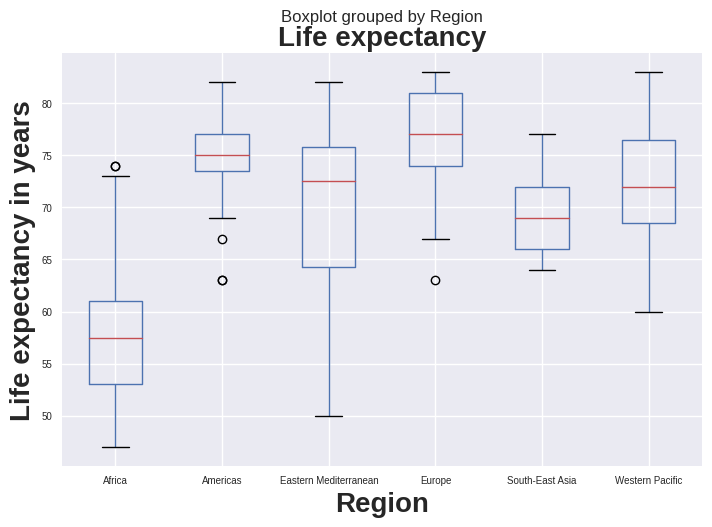

In [ ]:
plt.style.use('seaborn')
boxplot = Data.boxplot(column=['LifeExpectancy'], by=['Region'], fontsize=7)
plt.title('Life expectancy', fontweight = 'bold', fontsize=20)
plt.ylabel('Life expectancy in years', fontweight='bold', fontsize=20)
plt.xlabel('Region', fontweight='bold', fontsize=20)
plt.show()

##**Findings from the BoxPlot:**

**Africa:** Data tells us that the Life expectancy of Africans is mostly in Quartile group 4 from age just above 60 to the Upper whisker, age around 73 and an outlier of age 74. Africa's median age expectancy is between 55-60 years. Its Quartile group 1 has people below the age of 55, and even lower than 50. It is a comparatively tall boxplot.


**Americas:** Data tells us that there is very little variability in the life expectancy of Americans as it is a comparatively short boxplot. With the median at 75 years, 3rd Quartile from 75 to around 77, the 2nd Quartile starts at age 73/74 to 75. The inter-Quartile range is basically even between both the 2nd and 3rd Quartiles, so it represents 50% of the data. The first and 4th quartiles are also comparatively even. The 4th ranging from age 77 to just above 80, the 1st quartile rangez from around age 69 to around age 74, but; it has two low-outliers. One at age 66 or 67 and another at 63 or 64. 


**Easter-Mediterrean:** Its boxplot is also a tall one with the first two quartiles being very dominant. Q1 ranges from ages 5o-64, Q2 ranges from ages 64-72, the median is around 72. Then Q3 ranges from ages 72-76. Q4 ranges from 76-above 80 years. It has no outliers. The lower whisker and upper whiskers range from 50 to above 80 respectively. All four sections of the boxplot are uneven in size.


**Europe:** Europe's boxplot is generally higher than all the other regions'. Starting with a low outlier at age 73, Q1 ranging from ages 67-74, Q2 ranges from ages 74-77. The median is at 77 years. Q3 ranges from ages 77-81 then Q4 starts at age 81 to 83 years. Which also seems like the highest expectancy within this dataset.


**South-East Asia:** This is another comparatively short boxplot. Q1 starts at age 64, but at age expactancy 66 starts Q2 which is comparatively equal to Q3. The median is at age 69. Q3 ends at age 72. Then Q4 dominates most of the age expectancy as it ranges fron age 72 to the upper whisker at age 77.


**Western Pacific:** Western Pacific's boxplot has the first and last quartiles seemingly even. Q2 seems slightly smaller than Q3 but the Inter-quartile range looks to take up 50% of the data. Q1 starts at age 60, Q2 at age 68, median at age 72, Q3 ends at age 76 and finally, the upper whisker is found at age approximately 83. 

#**Life expectancy related to wealth across different regions:**

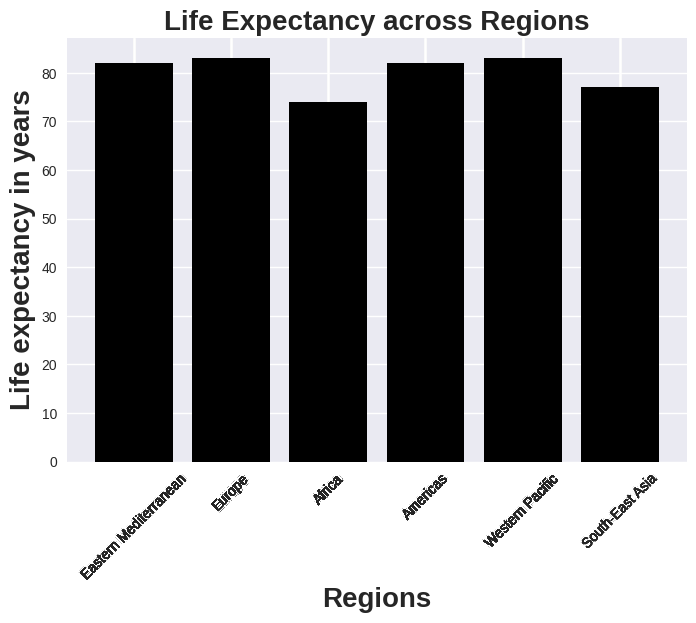

In [ ]:
plt.bar(Data.Region, Data.LifeExpectancy, color='k')
plt.title('Life Expectancy across Regions', fontweight='bold', fontsize=20)
plt.xlabel('Regions', fontweight='bold', fontsize=20)
plt.ylabel('Life expectancy in years', fontweight='bold', fontsize=20)
plt.xticks(Data.Region, rotation=45)
plt.show()

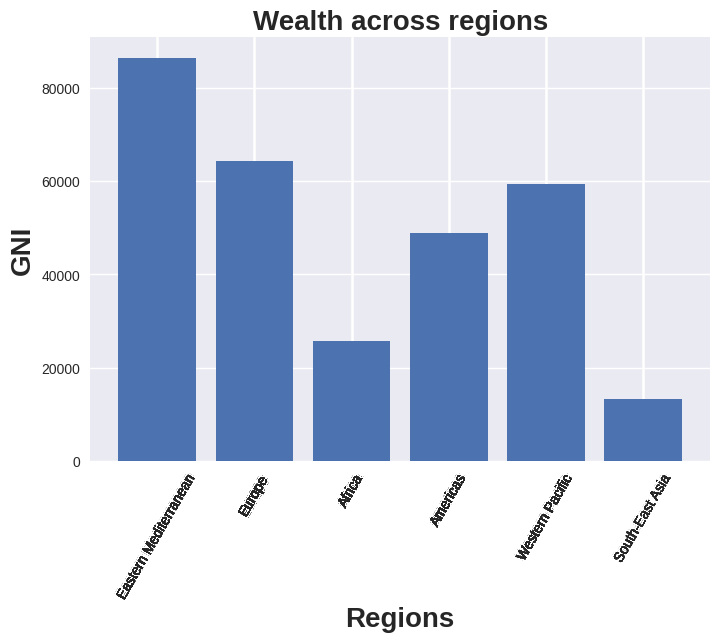

In [ ]:
plt.style.use('seaborn')
plt.bar(Data.Region, Data.GNI)
plt.title('Wealth across regions', fontweight='bold', fontsize=20)
plt.xlabel('Regions', fontweight='bold', fontsize=20)
plt.ylabel('GNI', fontweight='bold', fontsize=20)
plt.xticks(Data.Region, rotation=60)
plt.show()

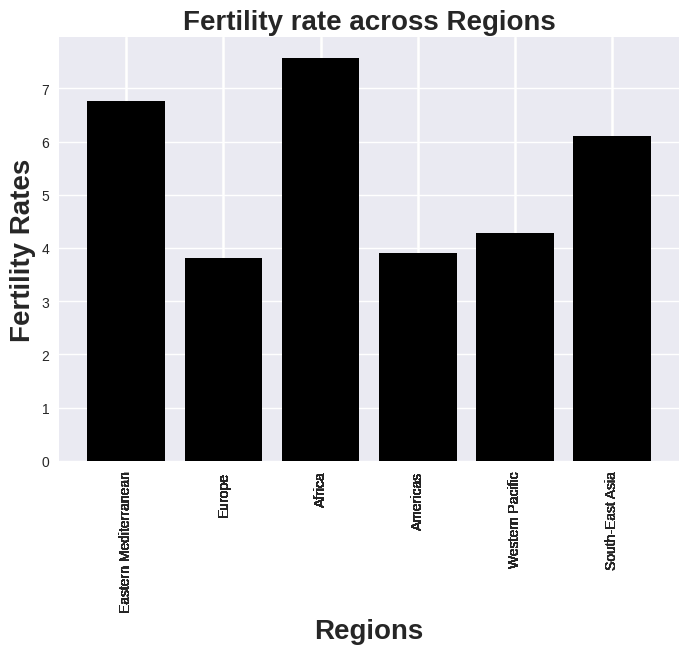

In [ ]:
plt.bar(Data.Region, Data.FertilityRate, color = 'k')
plt.title('Fertility rate across Regions', fontweight='bold', fontsize=20)
plt.xlabel('Regions', fontweight='bold', fontsize=20)
plt.ylabel('Fertility Rates', fontweight='bold', fontsize=20)
plt.xticks(Data.Region, rotation='vertical')
plt.show()

**Findings from the above 3 graphs related to Africa:**

On the *first graph* we're taking a look at Life expectancy between regions. Africa has the lowest life expectancy.
From the *second graph* we see that Africa is one of the two poorest regions, with South-East Asia being the poorest through regions.
The *third graph* clarifies the relationship between fertility rates across regions. It is clear that African countries are leading this one, followed by Eastern-Mediterranean countries.




*These findings about African countries seem to hold. Africa is rather poor, has the lowest life expectancy and has the highest fertility rates*

#**The relationship between literacy and life expectancy by Region**

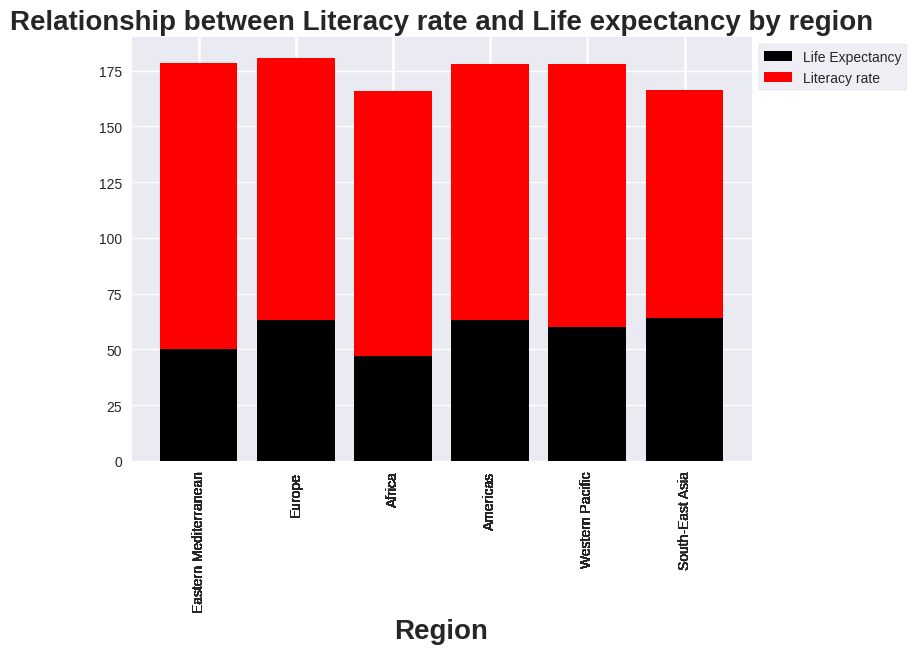

In [ ]:
plt.style.use('seaborn')
plt.bar(Data.Region, Data.LifeExpectancy, color='k')
plt.bar(Data.Region, Data.LiteracyRate, bottom= Data.LifeExpectancy, color='r')
plt.title('Relationship between Literacy rate and Life expectancy by region', fontsize=20, fontweight='bold')
plt.xlabel('Region', fontweight='bold', fontsize=20)
plt.legend(['Life Expectancy', 'Literacy rate'], bbox_to_anchor=(1, 1), frameon=True, loc='upper left')
plt.xticks(Data.Region, rotation=90)
plt.show()

# 3. Conclusion and insights 

Findings from this dataset informs us that Japan is the country with the smallest percentage of the population aged 15 and below, and Niger has the highest percentage in that comparison.

Western Pacific has the highest percentage of the population over the age of 60. As illustrated by the very first graph.

The scatter plot also enlightens us on the relationship between wealth between regions and fertility rates, it is an inversely proportional one. Typical cases go as follows, the richer a region is- the lower its fertility rate.

Africa and South-East Asia have the lowest literacy rates. While South-East Asia and Europe have the lowest child mortality rates, Africa is leading the charts. Africa also has the lowest life expectancy.

Eastern Mediterranean is the wealthiest region, South East Asia is the poorest. Anericas, Europe and Western Pacific regions all have similar fertility rates and life expectancy.

The above graph tells us that Africa and South-East Asia have similar Literacy rates but Africa is less literate than South-East Asia. Africa also has the lowest life expectancy.